In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops

In [6]:
n_x = 100
m = 10000
output_range = 1000
train_percentage = 0.9

# Create the data
features = np.random.randint(output_range, size=(n_x, m))
labels = features[0].reshape(1,m)

# Shuffle the data
order = np.argsort(np.random.random(m))
features = features[:,order]
labels = labels[:,order]

# Split between train and test
X_train = features[:,0:int(train_percentage*m)]
Y_train = labels[:,0:int(train_percentage*m)]

X_test = features[:,int(train_percentage*m):]
Y_test = labels[:,int(train_percentage*m):]

# Normalize the inputs and outputs based on the training set mean and variance
x_mean = X_train.mean(axis=1).reshape(n_x,1)
x_variance = X_train.var(axis=1).reshape(n_x,1)
X_train = (X_train-x_mean)/x_variance
X_test = (X_test-x_mean)/x_variance

y_mean = Y_train.mean(axis=1).reshape(1,1)
y_variance = Y_train.var(axis=1).reshape(1,1)
Y_train = (Y_train-y_mean)/y_variance
Y_test = (Y_test-y_mean)/y_variance

Cost after 0 epochs: 0.354055
Cost after 500 epochs: 0.049981
Cost after 1000 epochs: 0.013648
Cost after 1500 epochs: 0.002411
Cost after 2000 epochs: 0.000233
Cost after 2500 epochs: 0.000010
Cost after 3000 epochs: 0.000000
Cost after 3500 epochs: 0.000001
Cost after 4000 epochs: 0.000000
Cost after 4500 epochs: 0.000001

Training set accuracy: 0.9988889
Test set accuracy: 0.998
[[ 9.99997675e-01 -1.00906057e-08  4.32609681e-08  4.06931413e-08
  -2.77053935e-08  4.29689955e-08 -1.82307094e-08  7.15298825e-08
  -3.39837065e-08 -4.06434388e-08 -4.20702015e-08  1.22811183e-09
   4.20768060e-08 -2.07975663e-08  1.37625431e-08 -1.15078791e-07
   4.31728715e-08  4.12469596e-08 -8.45365644e-09  3.01599883e-08
   1.82389197e-08  4.72727884e-08 -4.32862386e-08  2.01714307e-08
   3.39183970e-08 -1.87740419e-08 -4.62626808e-08 -1.76526868e-07
  -1.98522780e-08 -2.35081021e-08  2.28112409e-08 -2.55201442e-08
   4.15658192e-08 -4.35194991e-08  2.13820979e-08  2.67879123e-08
   1.27357875e-08  2.

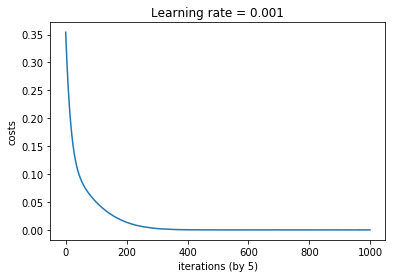

In [12]:
# Hyperparameters
learning_rate = 0.001
number_epochs = 5000
# Hyperparameters

ops.reset_default_graph()
costs = []

# Create placeholders for the featuers and labels
X = tf.placeholder(tf.float32, shape=(n_x, None), name='X')
Y = tf.placeholder(tf.float32, shape=(1, None), name='Y')

# Create the network weights
W1 = tf.get_variable('W1', (1,n_x), initializer=tf.contrib.layers.xavier_initializer(seed=1))
b1 = tf.get_variable('b1', (1,1), initializer=tf.zeros_initializer())
W2 = tf.get_variable('W2', (10,10), initializer=tf.contrib.layers.xavier_initializer(seed=2))
b2 = tf.get_variable('b2', (10,1), initializer=tf.zeros_initializer())
W3 = tf.get_variable('W3', (10,10), initializer=tf.contrib.layers.xavier_initializer(seed=3))
b3 = tf.get_variable('b3', (10,1), initializer=tf.zeros_initializer())
W4 = tf.get_variable('W4', (10,10), initializer=tf.contrib.layers.xavier_initializer(seed=4))
b4 = tf.get_variable('b4', (10,1), initializer=tf.zeros_initializer())
W5 = tf.get_variable('W5', (10,10), initializer=tf.contrib.layers.xavier_initializer(seed=5))
b5 = tf.get_variable('b5', (10,1), initializer=tf.zeros_initializer())
W6 = tf.get_variable('W6', (10,10), initializer=tf.contrib.layers.xavier_initializer(seed=6))
b6 = tf.get_variable('b6', (10,1), initializer=tf.zeros_initializer())
W7 = tf.get_variable('W7', (10,10), initializer=tf.contrib.layers.xavier_initializer(seed=7))
b7 = tf.get_variable('b7', (10,1), initializer=tf.zeros_initializer())
W8 = tf.get_variable('W8', (1,10), initializer=tf.contrib.layers.xavier_initializer(seed=8))
b8 = tf.get_variable('b8', (1,1), initializer=tf.zeros_initializer())

# Create the network structure
A0 = X
Z1 = W1@A0+b1
# A1 = tf.nn.relu(Z1)
# Z2 = W2@A1+b2
# A2 = tf.nn.relu(Z2)
# Z3 = W3@A2+b3
# A3 = tf.nn.relu(Z3)
# Z4 = W4@A3+b4
# A4 = tf.nn.relu(Z4)
# Z5 = W5@A4+b5
# A5 = tf.nn.relu(Z5)
# Z6 = W6@A5+b6
# A6 = tf.nn.relu(Z6)
# Z7 = W7@A6+b7
# A7 = tf.nn.relu(Z7)
# Z8 = W8@A7+b8
Y_hat = Z1

# Calculate the cost form the network prediction
cost = tf.losses.mean_squared_error(labels=Y,
                                    predictions=Y_hat,
                                    reduction=tf.losses.Reduction.SUM)

# Create the optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

# Run the tf session to train and test
init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    for epoch in range(number_epochs):
        _, epoch_cost = session.run([optimizer, cost], feed_dict={X:X_train, Y:Y_train})
        if epoch % 500 == 0:
            print('Cost after %i epochs: %f' % (epoch, epoch_cost))
        if epoch % 5 == 0:
            costs.append(epoch_cost)
    
    # Evaluate accuracy
    correct_predictions = tf.abs(1-Y_hat/Y) < 0.01
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, 'float'))
    print('\nTraining set accuracy: ' + str(accuracy.eval({X:X_train, Y:Y_train})))
    print('Test set accuracy: ' + str(accuracy.eval({X:X_test, Y:Y_test})))
    print(session.run(W1))
    print(session.run(b1))

# Plot cost
plt.plot(np.squeeze(costs))
plt.ylabel('costs')
plt.xlabel('iterations (by 5)')
plt.title('Learning rate = ' + str(learning_rate))
plt.show()
